In [3]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [4]:
from core.models import rUNet
from core.utils.inference import inference_phase_rUNet_plot_notebook
from core.utils.data import define_dataset, select_dist

In [5]:
from core.utils.data.transformers import ChannelsFirst, Rescale, ToTensor, Crop, GaussianNoise, RandomCrop, Swap, \
        FlipUD, FlipLR

In [6]:
from functools import partial

In [7]:
import torch

In [8]:
%matplotlib inline

In [9]:
regex = re.compile(r'\d+')

In [10]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss_augmentation_gaus150'

In [11]:
root_path = partial(os.path.join, saved_models)

In [12]:
data_folder = ('/storage/yw18581/data/dataset/')

In [13]:
model_names = os.listdir(saved_models)

In [11]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

---

### Inference on test unseen data

In [13]:
training_dist = [2,4,10,20,25,35]
unseen_dist = [1,3,15,30]
selected_distances = select_dist(data_folder, unseen_dist)

In [15]:
base_transformers = [Crop(row_slice=slice(0,1400), col_slice=slice(1000,None)),
                           Rescale(scale=0.25), ChannelsFirst(),ToTensor()]

In [ ]:
base_transfofrmers_2 = [RandomCrop(p=1), Swap(p=0.7), FlipLR(p=0.7), FlipUD(p=0.7),
                        Rescale(0.25), ChannelsFirst(),ToTensor()]

In [24]:
data_loaders, data_length = define_dataset(root_folder=data_folder, 
                                           base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=4, include_list=selected_distances,
                                            alldata=True, multi_processing=4)

In [25]:
def predict_coef_epoch(coeff, epoch):
    filelist, epochs = get_fnames(coeff)
    model_fname = filelist[int(np.argwhere(epochs==epoch)[0])]
    print(model_fname)
    torch.cuda.empty_cache()
    model = rUNet(out_size=1)
    checkpoint = torch.load(root_path(model_fname))['model_state_dict']
    #print(checkpoint)
    model.load_state_dict(checkpoint)
    
    print('Checkpoint loaded')
    inference_phase_rUNet_plot_notebook(model, data_loaders, data_length,
                                       batch_size=4, stop=1, test=False)

    return

Trained_rUNet_pytorch_6positions_dataset_110epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [16.977842]


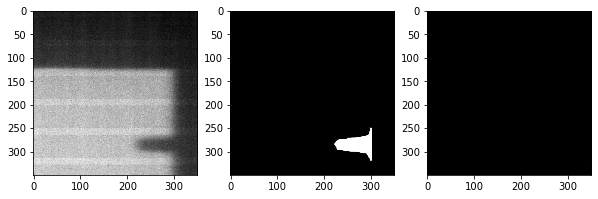

2: true_dist: 15, pred_dist: [17.004553]


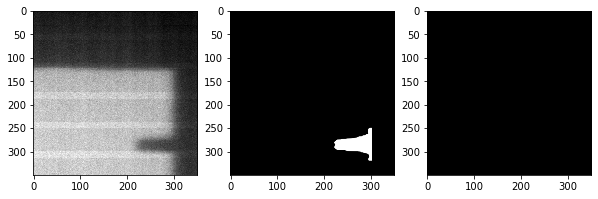

3: true_dist: 15, pred_dist: [16.897089]


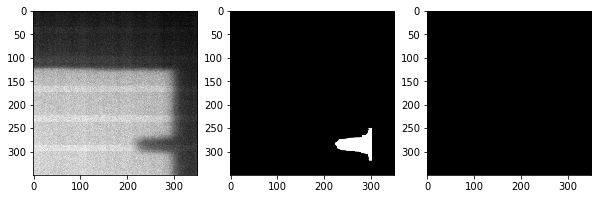

4: true_dist: 15, pred_dist: [16.918545]


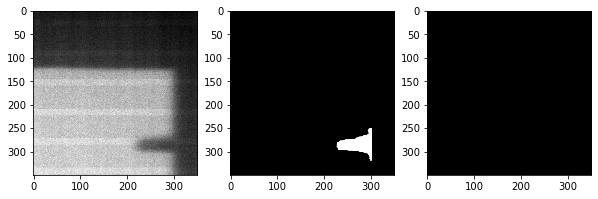

batch 2
1: true_dist: 15, pred_dist: [16.981619]


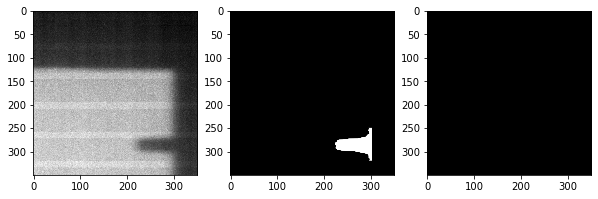

2: true_dist: 15, pred_dist: [17.034208]


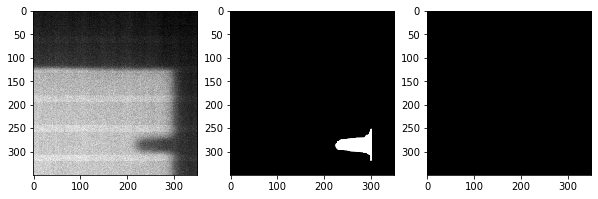

3: true_dist: 15, pred_dist: [17.022663]


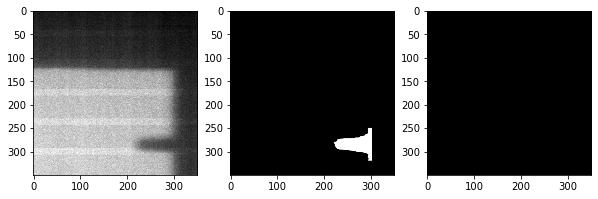

4: true_dist: 15, pred_dist: [16.96366]


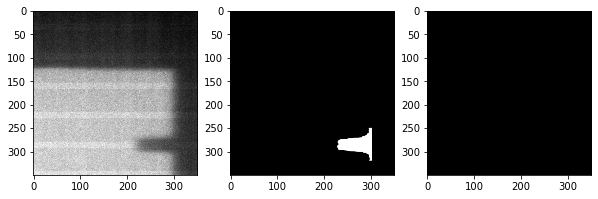

Trained_rUNet_pytorch_6positions_dataset_120epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [11.12587]


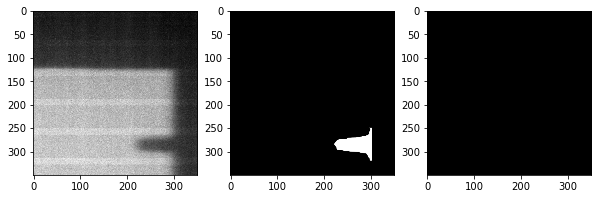

2: true_dist: 15, pred_dist: [13.411771]


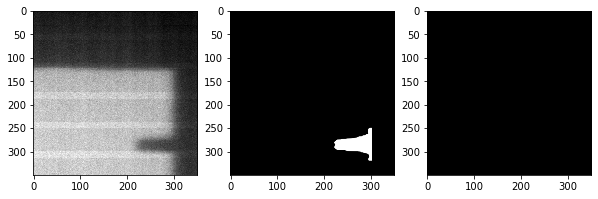

3: true_dist: 15, pred_dist: [12.521598]


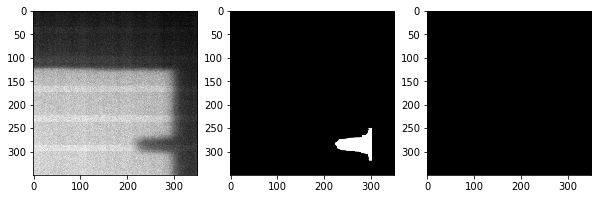

4: true_dist: 15, pred_dist: [12.41543]


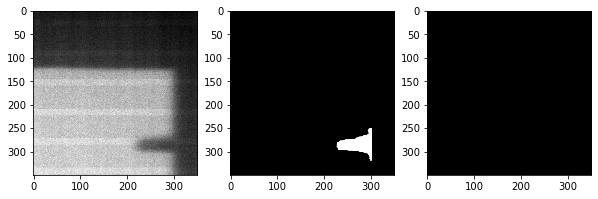

batch 2
1: true_dist: 15, pred_dist: [11.551984]


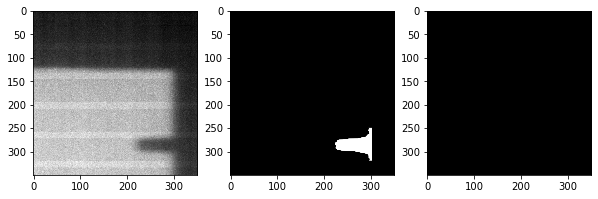

2: true_dist: 15, pred_dist: [12.803279]


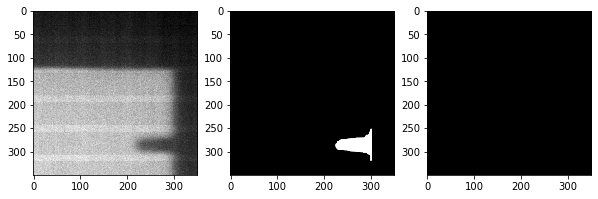

3: true_dist: 15, pred_dist: [13.853452]


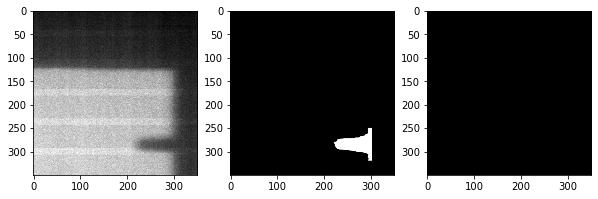

4: true_dist: 15, pred_dist: [13.490528]


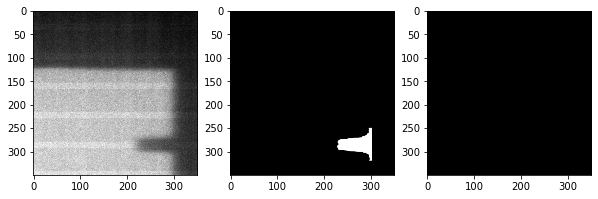

Trained_rUNet_pytorch_6positions_dataset_130epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [12.725302]


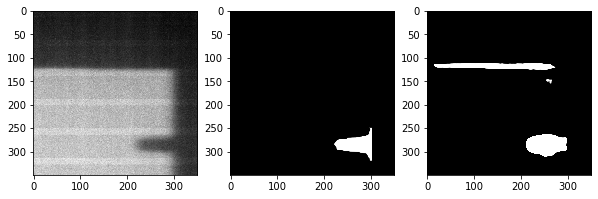

2: true_dist: 15, pred_dist: [14.154878]


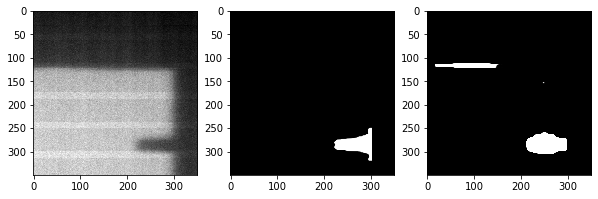

3: true_dist: 15, pred_dist: [12.597725]


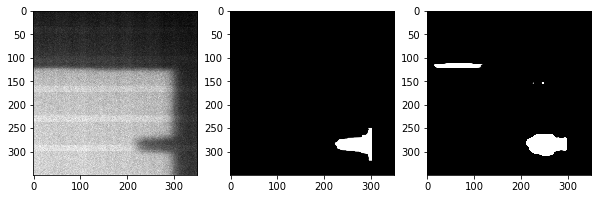

4: true_dist: 15, pred_dist: [12.947927]


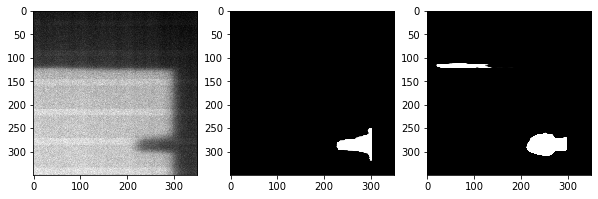

batch 2
1: true_dist: 15, pred_dist: [13.381496]


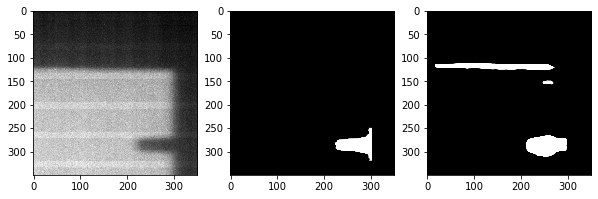

2: true_dist: 15, pred_dist: [13.726416]


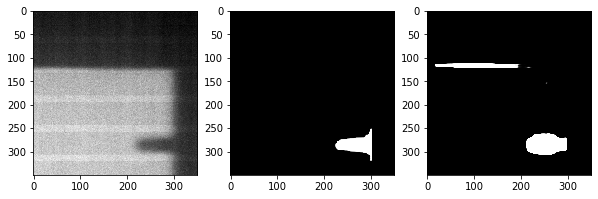

3: true_dist: 15, pred_dist: [13.562923]


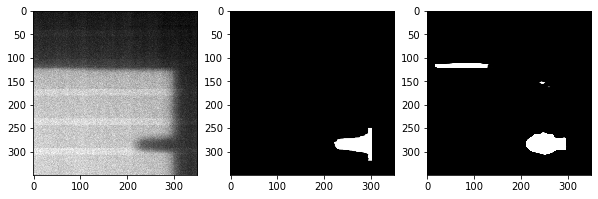

4: true_dist: 15, pred_dist: [13.740334]


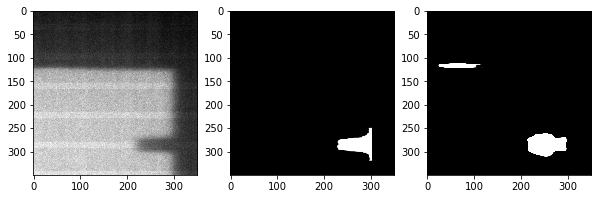

Trained_rUNet_pytorch_6positions_dataset_140epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [13.266111]


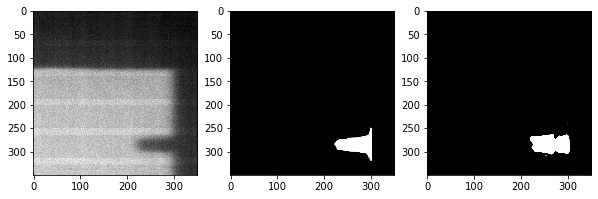

2: true_dist: 15, pred_dist: [14.42888]


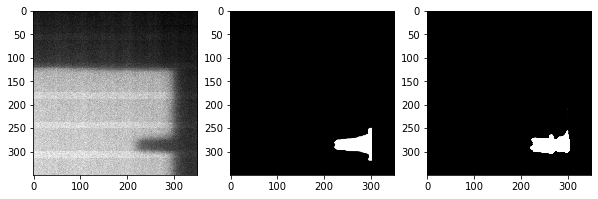

3: true_dist: 15, pred_dist: [13.521101]


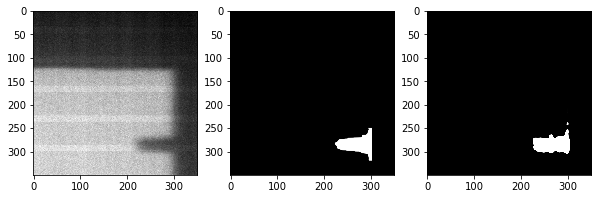

4: true_dist: 15, pred_dist: [13.339475]


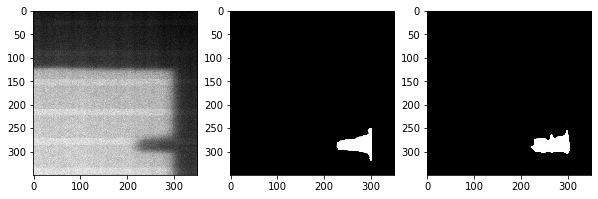

batch 2
1: true_dist: 15, pred_dist: [13.855473]


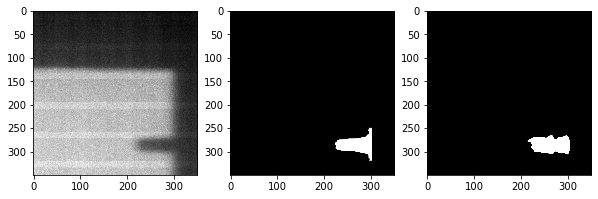

2: true_dist: 15, pred_dist: [14.122722]


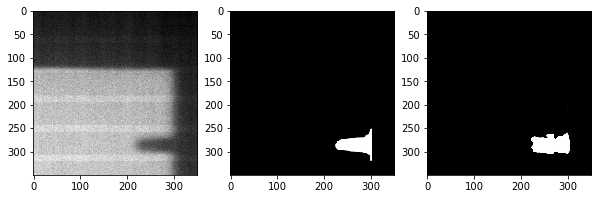

3: true_dist: 15, pred_dist: [14.032174]


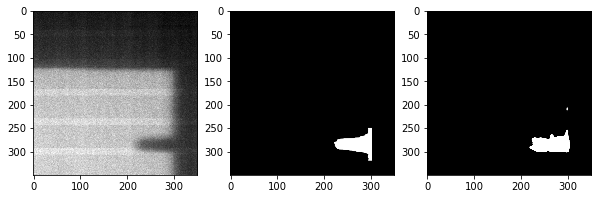

4: true_dist: 15, pred_dist: [14.391289]


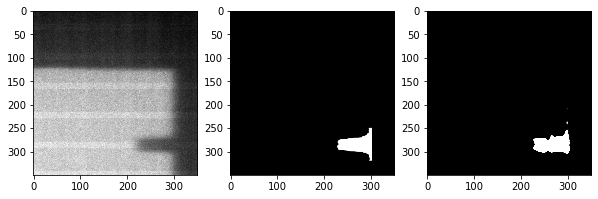

Trained_rUNet_pytorch_6positions_dataset_150epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [14.890803]


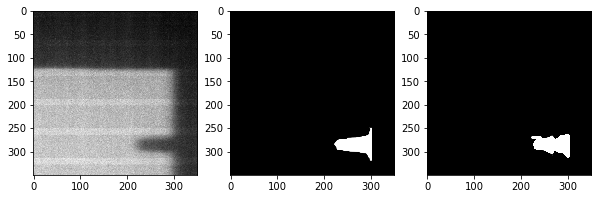

2: true_dist: 15, pred_dist: [15.698884]


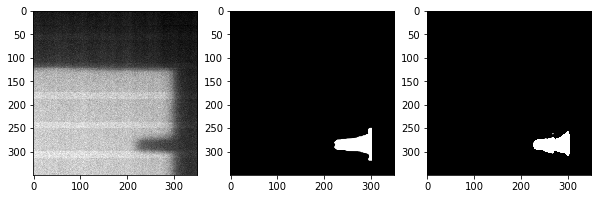

3: true_dist: 15, pred_dist: [15.060397]


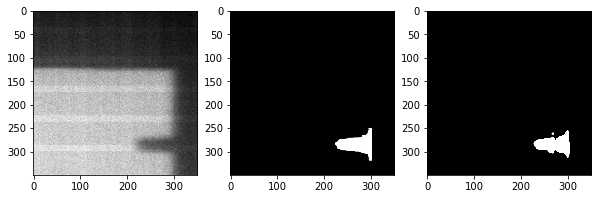

4: true_dist: 15, pred_dist: [14.986653]


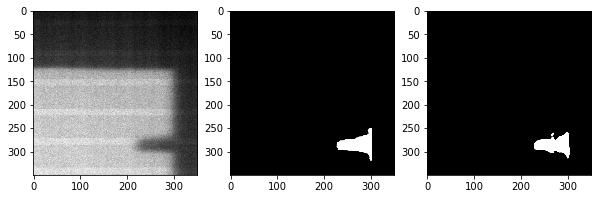

batch 2
1: true_dist: 15, pred_dist: [15.364018]


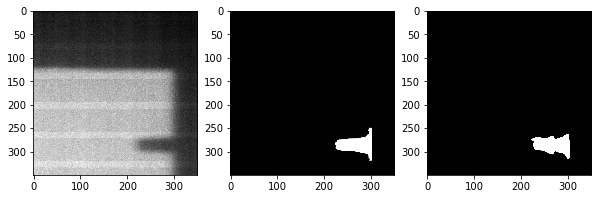

2: true_dist: 15, pred_dist: [15.357553]


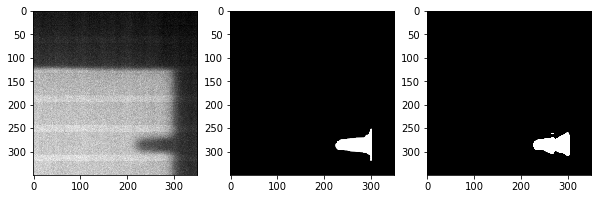

3: true_dist: 15, pred_dist: [15.0937395]


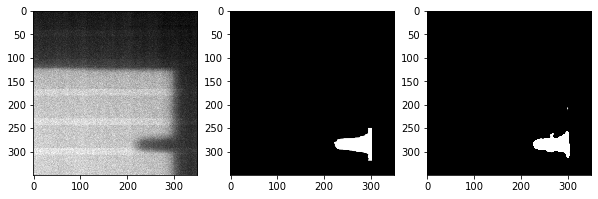

4: true_dist: 15, pred_dist: [15.8926115]


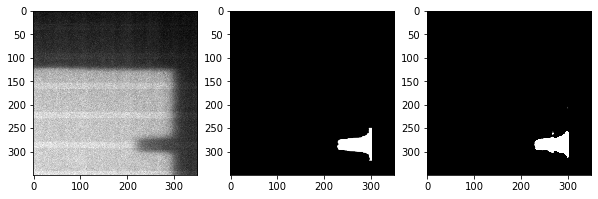

In [26]:
for epoch in np.arange(110, 160, 10):
    predict_coef_epoch(4, epoch)

Trained_rUNet_pytorch_6positions_dataset_150epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [14.890803]


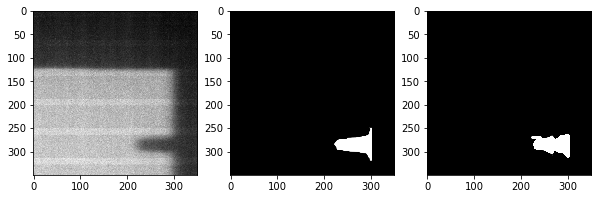

2: true_dist: 15, pred_dist: [15.698884]


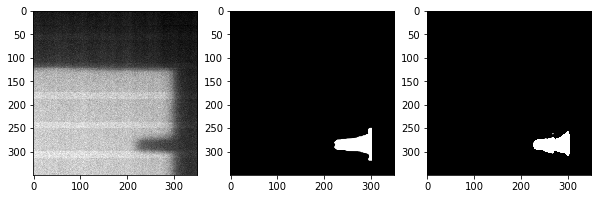

3: true_dist: 15, pred_dist: [15.060397]


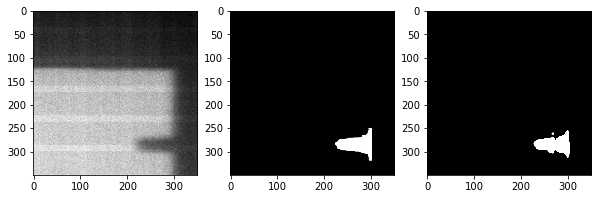

4: true_dist: 15, pred_dist: [14.986653]


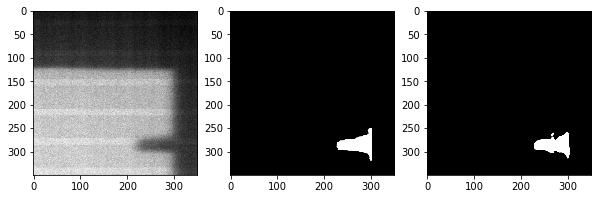

batch 2
1: true_dist: 15, pred_dist: [15.364018]


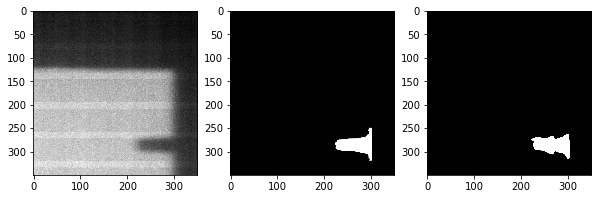

2: true_dist: 15, pred_dist: [15.357553]


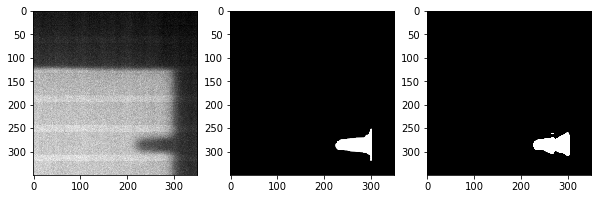

3: true_dist: 15, pred_dist: [15.0937395]


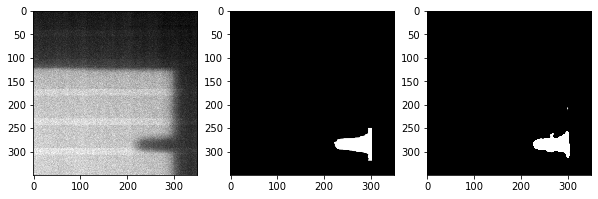

4: true_dist: 15, pred_dist: [15.8926115]


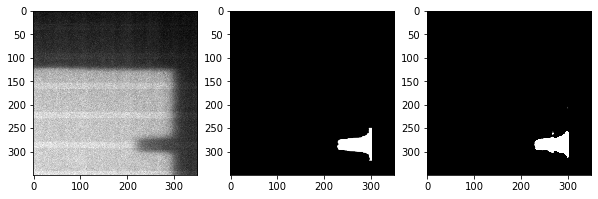

In [27]:
predict_coef_epoch(4, 150)

### Test on multi-leaf dataset

In [28]:
data_folder_multi = '/storage/yw18581/data/v2_avg/top_right/'

In [29]:
excluded = []

In [37]:
data_loaders, data_length = define_dataset(root_folder=data_folder_multi, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=4, excluded_list=excluded,
                                            alldata=True, multi_processing=4, load_mask=False)

In [38]:
def inference_phase_rUNet_plot_notebook(model, data_loaders, data_lengths, batch_size, stop=1, dev=0, test=True):
    from tqdm.notebook import tqdm
    import matplotlib.pyplot as plt

    device = torch.device("cuda:{}".format(dev) if torch.cuda.is_available() else "cpu")
    # model = cUNet(out_size=1)

    # model.load_state_dict(torch.load(model_name))
    model.eval()
    model.to(device);
    for i, batch in tqdm(enumerate(data_loaders), total=data_lengths // batch_size,
                     desc="Batch"):

        true_images = batch["image"]
        pred_masks, pred_dists = model(true_images.float().to(device))
        print("batch {}".format(i + 1))
        for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                                        pred_masks.cpu().detach().numpy(),
                                                                        pred_dists.cpu().detach().numpy())):
            print("{}: pred_dist: {}".format(j + 1, pr_dist))

            f = plt.figure(figsize=(10, 5))
            f.add_subplot(1, 2, 1)
            plt.imshow(img[0, ...], cmap='gray')
            f.add_subplot(1, 2, 2)
            plt.imshow(pr_msk[0, ...], cmap='gray')
            plt.show(block=True)

        if i == stop:
            break

Trained_rUNet_pytorch_6positions_dataset_140epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: pred_dist: [-27.563948]


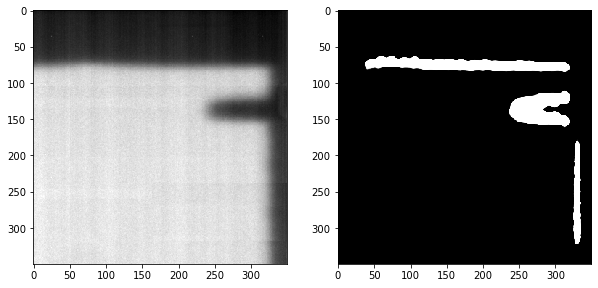

2: pred_dist: [-27.55343]


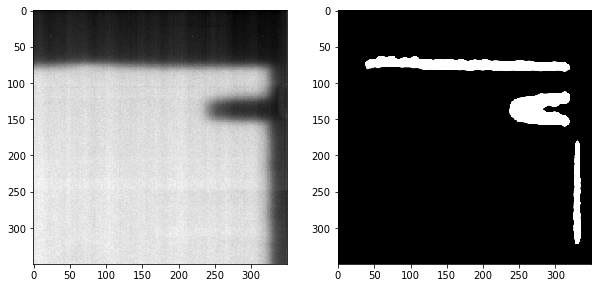

3: pred_dist: [-27.53119]


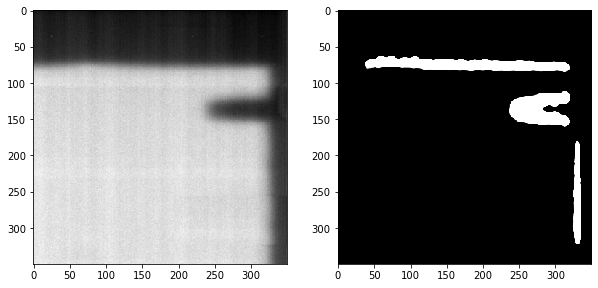

4: pred_dist: [-27.52485]


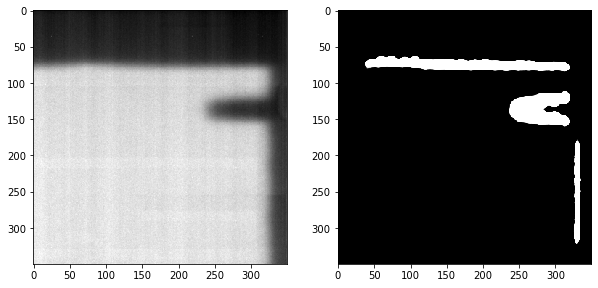

batch 2
1: pred_dist: [-27.521456]


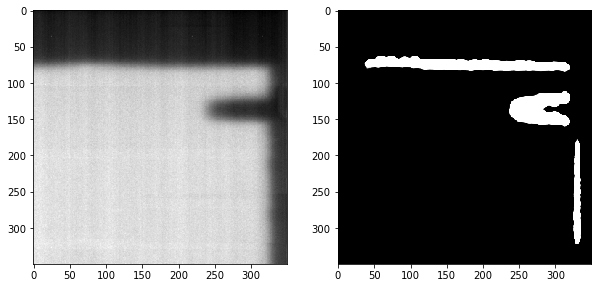

2: pred_dist: [-27.546446]


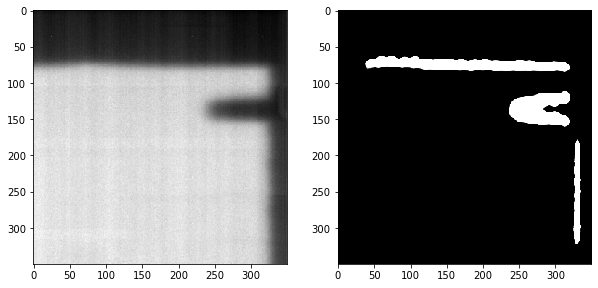

3: pred_dist: [-27.527134]


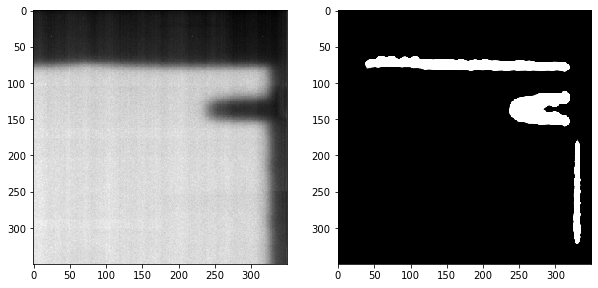

4: pred_dist: [-27.537897]


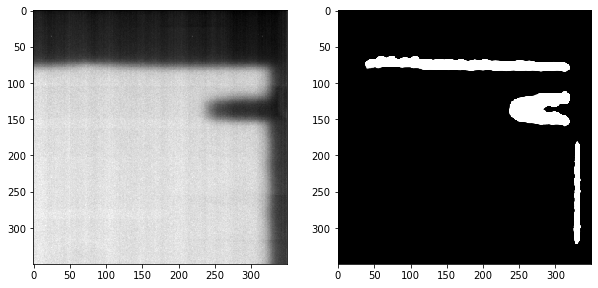

In [41]:
predict_coef_epoch(4,140)

---

#### Check training performance

In [14]:
history = np.load(os.path.join(saved_models,model_names[-1]), allow_pickle=True)

In [15]:
history.keys()

dict_keys(['train', 'val', 'epochs'])

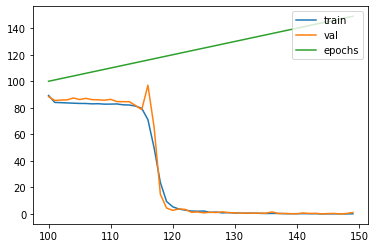

In [17]:
for key in history.keys():
    plt.plot(history['epochs'], history[key], label=key)
plt.legend(loc='upper right')